<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-2-Build/blob/master/EDA_BuildWeek_Unit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [0]:
df = pd.read_csv('/content/drive/My Drive/Datasets/Build_2/open_learning_analytics_kaggle.csv')

In [0]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
0,BBB,2014J,645371,F,East Anglian Region,Lower Than A Level,50-60%,0-35,0,60,N,Fail,464.0,61.0
1,BBB,2013J,577069,F,London Region,HE Qualification,10-20,0-35,0,60,N,Pass,51312.0,1380.0
2,BBB,2014J,630697,F,East Anglian Region,A Level or Equivalent,20-30%,0-35,0,60,N,Pass,651.0,78.0
3,BBB,2014B,2271743,F,Wales,A Level or Equivalent,0-10%,0-35,2,180,Y,Fail,2800.0,206.0
4,AAA,2014J,348807,M,East Midlands Region,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,12628.0,425.0


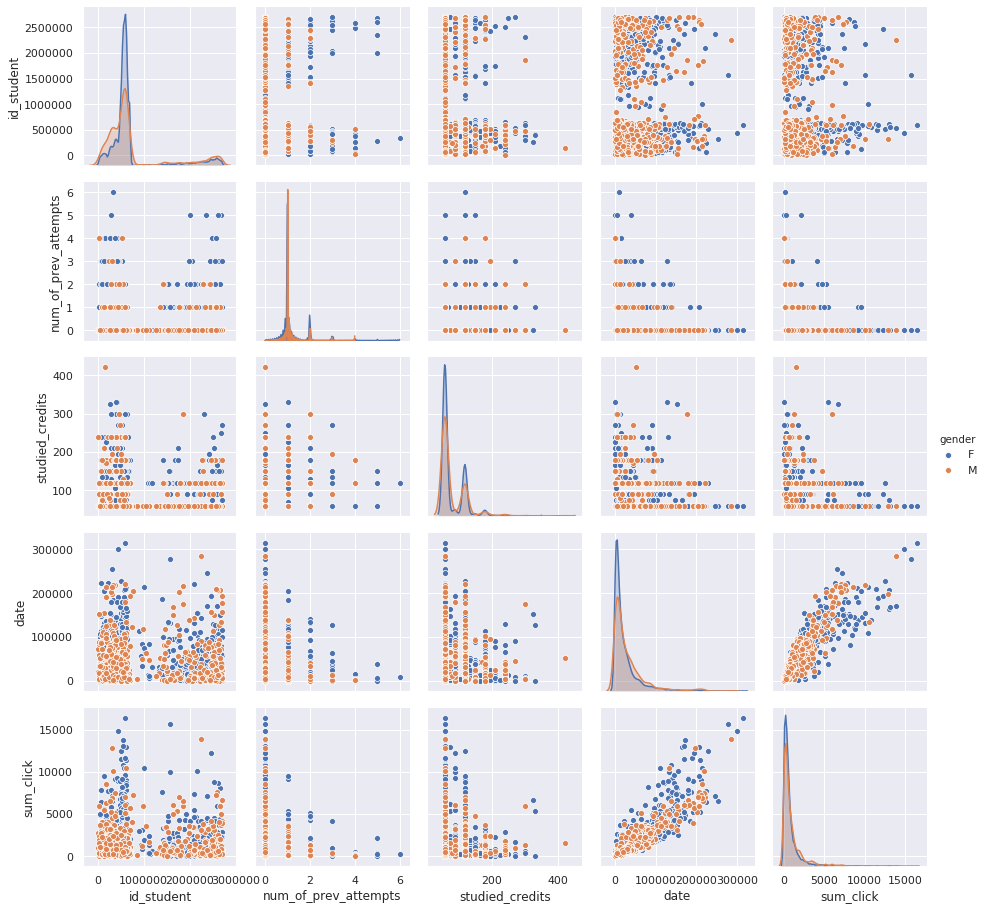

In [0]:
sns.pairplot(df, hue='gender')

In [0]:
df.studied_credits.unique()

array([ 60, 180,  90, 120, 325,  75, 150, 240, 270, 130, 330, 300, 165,
       195, 210, 135,  70, 250, 105, 170, 420,  80, 225])

In [0]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'date', 'sum_click'],
      dtype='object')

In [0]:
gendered = df.groupby('gender').final_result.value_counts(normalize=True)

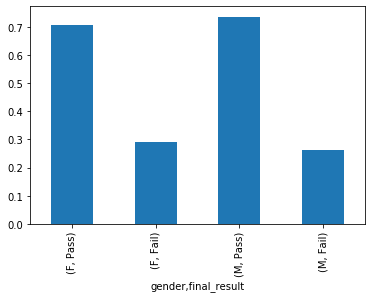

In [0]:
df.groupby('gender').final_result.value_counts(normalize=True).plot(kind="bar")

In [0]:
df.groupby('gender').highest_education.value_counts(normalize=True)

gender  highest_education          
F       A Level or Equivalent          0.451528
        Lower Than A Level             0.409634
        HE Qualification               0.126897
        No Formal quals                0.010119
        Post Graduate Qualification    0.001821
M       A Level or Equivalent          0.454918
        Lower Than A Level             0.336066
        HE Qualification               0.194672
        Post Graduate Qualification    0.009221
        No Formal quals                0.005123
Name: highest_education, dtype: float64

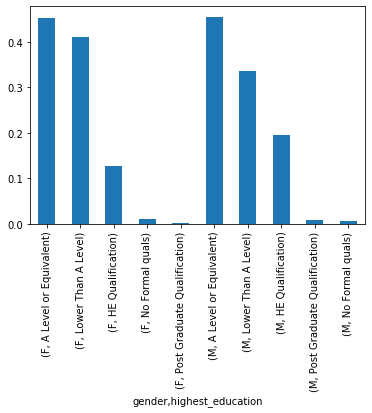

In [0]:
df.groupby('gender').highest_education.value_counts(normalize=True).plot(kind="bar")

In [0]:
z = df.groupby('gender').highest_education.value_counts(normalize=True).unstack().rename_axis(None)

del z.columns.name



In [0]:
z = z.reset_index().rename(columns={'index':'gender'})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a7fac19b0>,
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

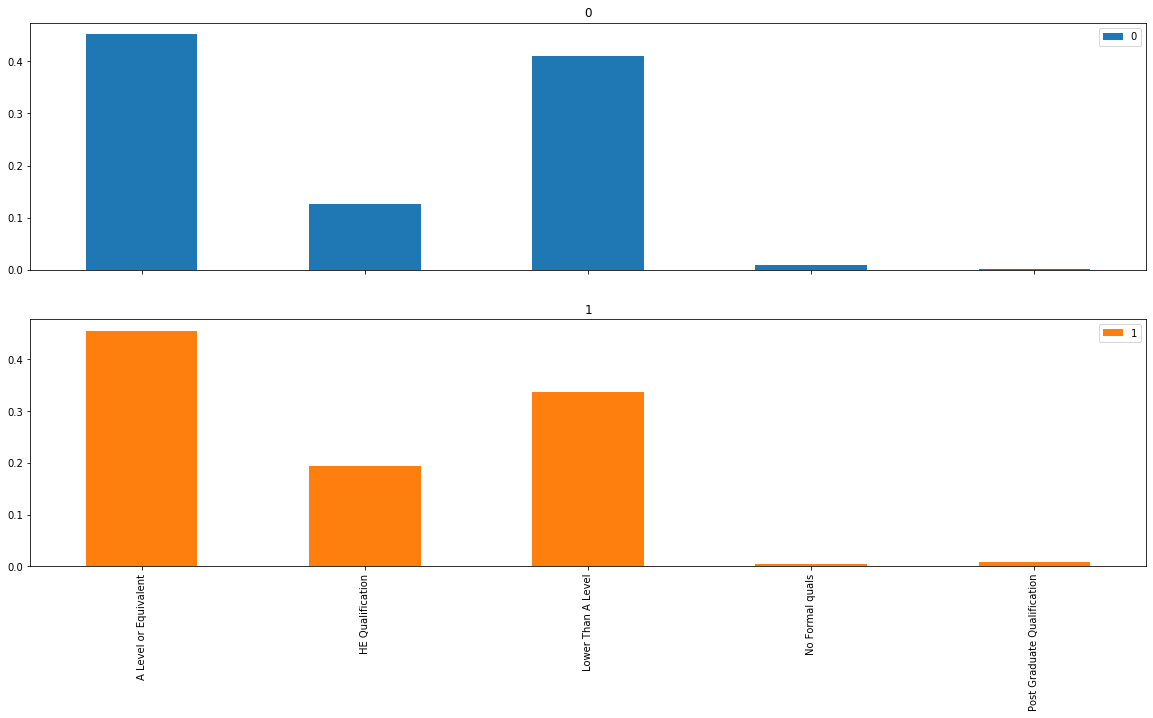

In [0]:

plt.figure(figsize=(20,20))

z.iloc[:,1:].T.plot(kind="bar", subplots=True, figsize=(20,10))

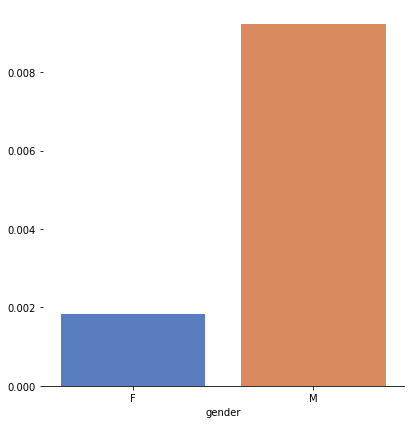

In [0]:
# import seaborn as sns
# sns.set(style="whitegrid")

g = sns.catplot(x="gender", y='Post Graduate Qualification',  data=z,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("")

In [0]:
z.columns

Index(['gender', 'A Level or Equivalent', 'HE Qualification',
       'Lower Than A Level', 'No Formal quals', 'Post Graduate Qualification'],
      dtype='object')

In [0]:
z

,gender,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification
0,F,0.451528,0.126897,0.409634,0.010119,0.001821
1,M,0.454918,0.194672,0.336066,0.005123,0.009221


In [0]:
# fig1, ax1 = plt.subplots()
# z.columns.tolist()
# ax1.pie(z, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# # Equal aspect ratio ensures that pie is drawn as a circle
# ax1.axis('equal')  
# plt.tight_layout()
# plt.show()

In [0]:
df.region.value_counts(normalize=True)

Wales                   0.116106
East Anglian Region     0.110191
Scotland                0.101234
South Region            0.085685
London Region           0.081967
West Midlands Region    0.077573
South West Region       0.074362
South East Region       0.069799
East Midlands Region    0.068954
Yorkshire Region        0.067602
North Western Region    0.067095
Ireland                 0.052729
North Region            0.026703
Name: region, dtype: float64

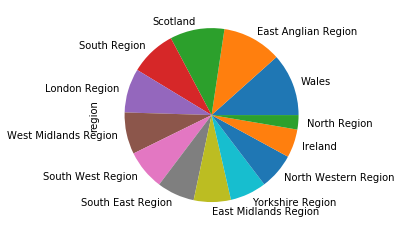

In [0]:
df.region.value_counts(normalize=True).plot(kind="pie")

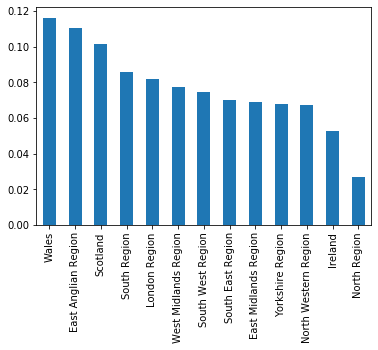

In [0]:
df.region.value_counts(normalize=True).plot(kind="bar")

In [0]:
df.groupby('region').final_result.value_counts(normalize=True).unstack().Pass.describe()

count    13.000000
mean      0.715109
std       0.066047
min       0.602015
25%       0.689873
50%       0.715686
75%       0.753205
max       0.852300
Name: Pass, dtype: float64

In [0]:
df.groupby('region').final_result.value_counts(normalize=True).unstack().Pass#.plot(kind="box")

region
East Anglian Region     0.722393
East Midlands Region    0.715686
Ireland                 0.753205
London Region           0.624742
North Region            0.689873
North Western Region    0.602015
Scotland                0.717863
South East Region       0.852300
South Region            0.786982
South West Region       0.756818
Wales                   0.656477
West Midlands Region    0.708061
Yorkshire Region        0.710000
Name: Pass, dtype: float64

In [0]:
g = df.groupby('region').final_result.value_counts(normalize=True).unstack().Pass#.plot(kind="box")

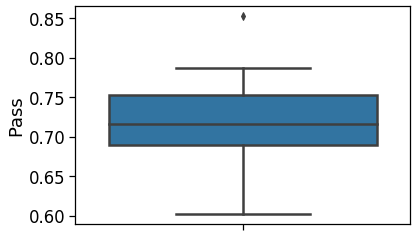

In [0]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.boxplot(y=g)


In [0]:
coded_results =  df.copy()

coded_results.final_result = df.final_result.replace({"Pass":1, "Fail": 0})

In [0]:
coded_results.corr()

,id_student,num_of_prev_attempts,studied_credits,final_result,date,sum_click
id_student,1.000000,0.001456,-0.004675,0.034502,0.080400,0.077437
num_of_prev_attempts,0.001456,1.000000,0.177788,-0.138449,-0.077052,-0.076873
studied_credits,-0.004675,0.177788,1.000000,-0.046579,-0.010220,-0.035000
final_result,0.034502,-0.138449,-0.046579,1.000000,0.312125,0.244923
date,0.080400,-0.077052,-0.010220,0.312125,1.000000,0.890215
sum_click,0.077437,-0.076873,-0.035000,0.244923,0.890215,1.000000


###Come back to this

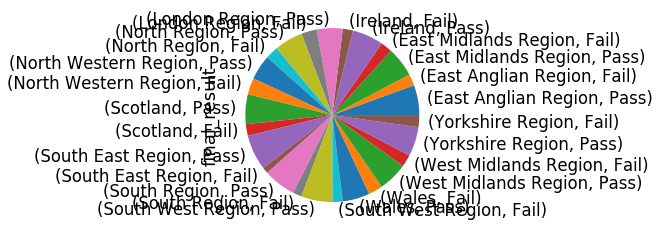

In [0]:
df.groupby('region').final_result.value_counts(normalize=True).plot(kind="pie") 

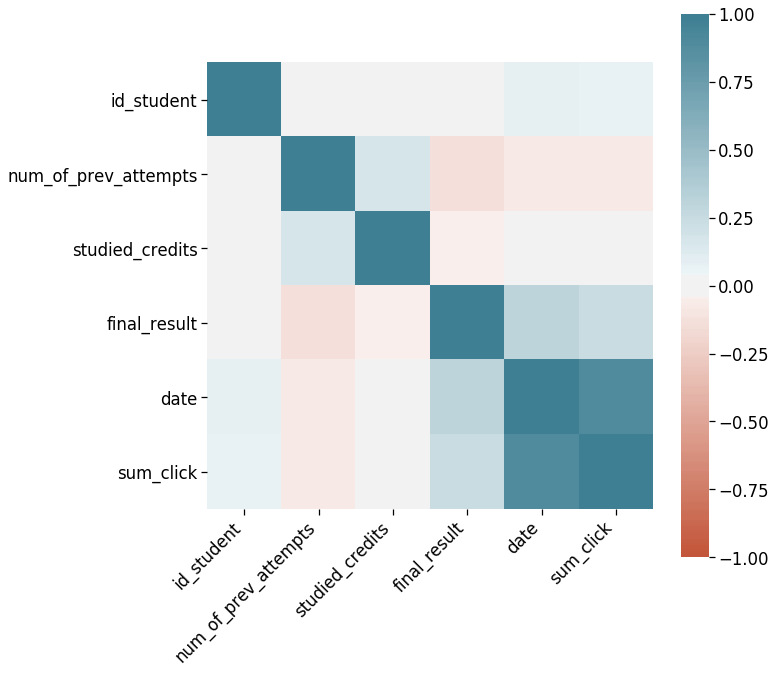

In [0]:
corr = coded_results.corr()#df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
df.corr()


,id_student,num_of_prev_attempts,studied_credits,date,sum_click
id_student,1.000000,0.001456,-0.004675,0.080400,0.077437
num_of_prev_attempts,0.001456,1.000000,0.177788,-0.077052,-0.076873
studied_credits,-0.004675,0.177788,1.000000,-0.010220,-0.035000
date,0.080400,-0.077052,-0.010220,1.000000,0.890215
sum_click,0.077437,-0.076873,-0.035000,0.890215,1.000000


###No strong correlations between continuous variables except for "date" and "sum_click".  

"date" is the number of days since the start of the module-presentation.
"sum_click" the number of times a student interacts with the material in a day.  Because I have already combined data for each student id, "sum_click" represents a cumulative sum.  "date" was already a cumulative sum, the data is not meaningfully altered in that the ratios between student "date" totals remain the same (thought the individual values are amplified by taking the cumulative of an already cumulative total). 

The correlation between "date" and "sum_click" (pearson's r = .89) may be a trivial result of the fact that the longer you have been on a module-presentation, the more opportunities you have had to interact with it (by clicking on different items). 

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 14 columns):
code_module             5917 non-null object
code_presentation       5917 non-null object
id_student              5917 non-null int64
gender                  5917 non-null object
region                  5917 non-null object
highest_education       5917 non-null object
imd_band                5917 non-null object
age_band                5917 non-null object
num_of_prev_attempts    5917 non-null int64
studied_credits         5917 non-null int64
disability              5917 non-null object
final_result            5917 non-null object
date                    5917 non-null float64
sum_click               5917 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 647.3+ KB


In [0]:
categorical_data = df.select_dtypes(exclude="number").copy()
categorical_data2 = coded_results.select_dtypes(exclude="number").copy() #encoded target

###Looking for possible correlations between categorical variables using the Cramer's V coefficient

Cramer's V is a statistical technique used to calculate associations between categorical variables. It is preferable to simply using χ² because the coefficient provides more information about the strength of correlation.  

To minimize the coding necessary to arrive at Cramer's V, I'll be using the [dython](https://github.com/shakedzy/dython/blob/master/dython/nominal.py) package to plot categorical associations. 

I also benefited tremendously from the explantion of Cramer's V found [here](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). 

In [0]:
#pip install dython #or
!pip install git+https://github.com/shakedzy/dython.git

import dython.nominal as dynom

  Cloning https://github.com/shakedzy/dython.git to /tmp/pip-req-build-our83fl9
  Running command git clone -q https://github.com/shakedzy/dython.git /tmp/pip-req-build-our83fl9
  Created wheel for dython: filename=dython-0.4.0-cp36-none-any.whl size=15233 sha256=799b7f37a3ed907d48aa10436c8f17ff1485d418fa93acb15d2a1f2e530f34b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-hi2jzqgp/wheels/22/e0/2a/eb6a41c2901366c786f2cc8d9bcd73911e9a1e36c5f06be49b
Successfully built dython


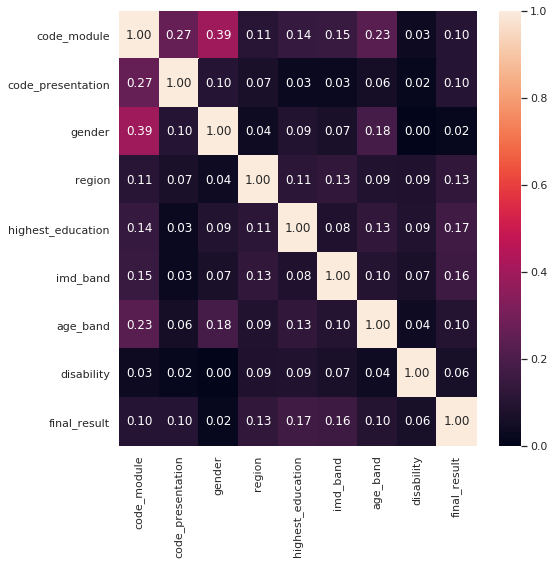

In [0]:
sns.set()
fig, ax = plt.subplots(figsize=(8,8))

dynom.associations(categorical_data, theil_u=False, ax=ax) 


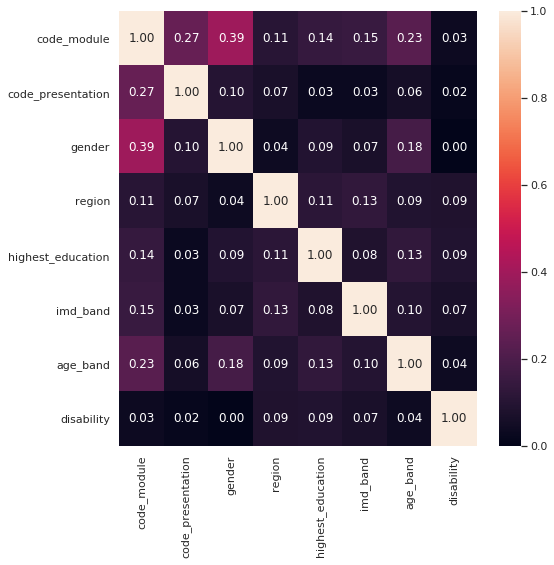

In [0]:
fig, ax = plt.subplots(figsize=(8,8))

dynom.associations(categorical_data2, theil_u=False, ax=ax) 

All categorical associations are below .5, so no strong associations at first glance.  The association between *code_module* and *gender* is relatively high, but this can be explained by a significant gender imbalance in the population of students who took one of the modules.  Specifically, module BBB is around **88% Female**. 

Concerning traditionally higher-risk demographics, socioeconomic level and disability do not appear to be closely associated with a pass or fail.

There are no strong associations between *final result* and other variables. This is worth taking note of because *final result* is the target variable being used as a proxy for assessing academic performance. Of the low associations, however, the highest formal education attained by learners (*highest education*) is the strongest (.17).   

In [0]:
df.groupby('code_module').gender.value_counts(normalize=True)

code_module  gender
AAA          M         0.599002
             F         0.400998
BBB          F         0.884123
             M         0.115877
Name: gender, dtype: float64

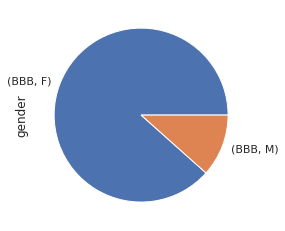

In [0]:
df.query("code_module == 'BBB'").groupby('code_module').gender.value_counts(normalize=True).plot(kind='pie')

(-1.1129381165465724,
 1.100616100787932,
 -1.1182591355863496,
 1.1137844324484751)

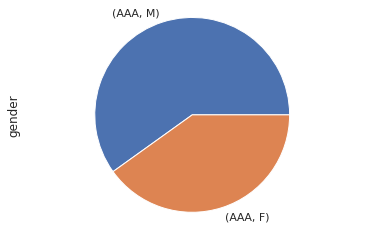

In [0]:
df.query("code_module == 'AAA'").groupby('code_module').gender.value_counts(normalize=True).plot(kind='pie')
plt.axis('equal')

In [0]:
numerical_data = df.select_dtypes(exclude=object)
numerical_data2 = coded_results.select_dtypes(exclude=object)


In [0]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 5 columns):
id_student              5917 non-null int64
num_of_prev_attempts    5917 non-null int64
studied_credits         5917 non-null int64
date                    5917 non-null float64
sum_click               5917 non-null float64
dtypes: float64(2), int64(3)
memory usage: 231.3 KB


In [0]:
numerical_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 6 columns):
id_student              5917 non-null int64
num_of_prev_attempts    5917 non-null int64
studied_credits         5917 non-null int64
final_result            5917 non-null int64
date                    5917 non-null float64
sum_click               5917 non-null float64
dtypes: float64(2), int64(4)
memory usage: 277.5 KB


In [0]:

"""
#The correlation ratio answers the question:
Given a continuous number, how well can you know to which category it is associated?* 
(Zychlinski, 2018 [paraphrased]
"""

def dataframe_corr_ratio(cat_data,num_data): #add top_ten=True parameter later
  ratio_list = []
  ratio_names = []
  for i in range(len(cat_data.T)):
    for j in range(len(num_data.T)):
      new_ratio = dynom.correlation_ratio(cat_data.iloc[:,i], num_data.iloc[:,j])
      new_name =  num_data.iloc[:,j].name +  " ⟶ " + cat_data.iloc[:,i].name 
      ratio_list.append(new_ratio)
      ratio_names.append(new_name)
  zipped_ratios = list(zip(ratio_names, ratio_list))
  corr_ratio_df = pd.DataFrame(zipped_ratios, columns=["Continuous⟶Categorical_Association", "Ratio"])
  top_ten = corr_ratio_df.sort_values("Ratio", ascending=False).nlargest(10, columns="Ratio").reset_index(drop=True)
  top_ten.index = np.arange(1, len(top_ten)+1)
  return top_ten

In [0]:
dataframe_corr_ratio(categorical_data2, numerical_data2)

,Continuous⟶Categorical_Association,Ratio
1,date ⟶ code_module,0.325868
2,date ⟶ code_presentation,0.258955
3,sum_click ⟶ code_module,0.257359
4,sum_click ⟶ age_band,0.245339
5,date ⟶ age_band,0.242300
6,id_student ⟶ age_band,0.195200
7,final_result ⟶ highest_education,0.173356
8,final_result ⟶ imd_band,0.167535
9,id_student ⟶ code_module,0.144639
10,final_result ⟶ region,0.138441


In [0]:
dataframe_corr_ratio(categorical_data, numerical_data)

,Continuous⟶Categorical_Association,Ratio
1,date ⟶ code_module,0.325868
2,date ⟶ final_result,0.312125
3,date ⟶ code_presentation,0.258955
4,sum_click ⟶ code_module,0.257359
5,sum_click ⟶ age_band,0.245339
6,sum_click ⟶ final_result,0.244923
7,date ⟶ age_band,0.242300
8,id_student ⟶ age_band,0.195200
9,id_student ⟶ code_module,0.144639
10,num_of_prev_attempts ⟶ final_result,0.138449


In [0]:
cr= dataframe_corr_ratio(categorical_data, numerical_data)

In [0]:
cr_encoded = dataframe_corr_ratio(categorical_data2, numerical_data2)

In [0]:
def row_style(df):
    # if row.Name != 'Total':
    string="Continuous⟶Categorical_Association"
    if df[string].find("final_result")>-1:
        return pd.Series('background-color: #ff756e', df.index)
    else:
        return pd.Series('background-color: #fce0c7', df.index)
    # else:
    #     return pd.Series('', row.index)
cr_encoded.style.apply(row_style, axis=1)

,Continuous⟶Categorical_Association,Ratio
1,date ⟶ code_module,0.325868
2,date ⟶ code_presentation,0.258955
3,sum_click ⟶ code_module,0.257359
4,sum_click ⟶ age_band,0.245339
5,date ⟶ age_band,0.2423
6,id_student ⟶ age_band,0.1952
7,final_result ⟶ highest_education,0.173356
8,final_result ⟶ imd_band,0.167535
9,id_student ⟶ code_module,0.144639
10,final_result ⟶ region,0.138441


In [0]:
cr.style.apply(row_style, axis=1)

,Continuous⟶Categorical_Association,Ratio
1,date ⟶ code_module,0.325868
2,date ⟶ final_result,0.312125
3,date ⟶ code_presentation,0.258955
4,sum_click ⟶ code_module,0.257359
5,sum_click ⟶ age_band,0.245339
6,sum_click ⟶ final_result,0.244923
7,date ⟶ age_band,0.2423
8,id_student ⟶ age_band,0.1952
9,id_student ⟶ code_module,0.144639
10,num_of_prev_attempts ⟶ final_result,0.138449


The correlation ratio reveals that the continuous variables concerning

1.   the number days spent on the module-presentation,
2.   the number of clicks in VLE,  and
3.   the student id 

provide the most information about their association with specific categorical variables.

Regarding student id's association with age ranges and code_modules, these associations **may support not dropping** the column even though it has [high cardinality](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159). An important discovery when applying the correlation ratio to the dataset was that encoding *final result* led to a **reordering of the top 10 ratios**. When encoded, *final result* is shown to be slightly associated with three socioecononomic signals: *highest education*, *imd_band*, and *region*. 



